In [2]:
import ansys.aedt.core
import os
import tempfile
import time

In [3]:
from ansys.aedt.core import Maxwell3d


In [4]:
AEDT_VERSION = "2024.2"
NUM_CORES = 8
NG_MODE = False  # Open AEDT UI when it is launched.

In [ ]:
"D:\KangDH\deVSimulation\Ansys"

In [19]:
project_name = os.path.join("D:\EM_KDH\Moa_Edu_Sim\Basic", "PlanarCapacitor.aedt")

# 2D

In [ ]:
from ansys.aedt.core import Maxwell2d

m2d = Maxwell2d(
    project=project_name,
    version=AEDT_VERSION,
    new_desktop=False,
    non_graphical=NG_MODE,
)
rect1=m2d.modeler.create_rectangle([0, 0], [10, 10], name="rect1", matname="copper")
rect1.id
m2dModel=m2d.modeler
m2dModel.object_list   # List of objects in the model
m2dModel.object_names
rect1_1=m2dModel.get_object_from_name("rect1_1")

rect1=m2dModel.get_object_from_name("rect1")
rect1.color='Red'
Vertrect=rect1.vertices
rect1.fillet(Vertrect[1],None,0.5,0)


# 3D 

In [ ]:
m3dOdesign=m3d.odesign
m3dOdesign.SetSolutionType("Electrostatics")
m3dModel=m3d.modeler

## fillet 3D box edges with a given radius

In [ ]:
box1Obj=m3dModel.create_box([0,0,0],[10,10,10],name="box1",matname="copper")
box13D_vertices=box1Obj.vertices
box13D_vertices
box13D_edge=box1Obj.edges
box13D_vertices
edge4filltet=m3dModel.get_edgeids_from_vertexid(31,box1Obj.id)
box1Obj.fillet(None,edge4filltet[0:3],0.5,0)

## Electrostatics

In [ ]:
materials = m3d.materials
# conduc=materials.mat_names_aedt   

In [ ]:
downPlate=m3dModel.create_box([0,0,0],[25,25,2],name="downPlate",material="pec")
upPlate=m3dModel.create_box([0,0,3],[25,25,2],name="upPlate",material="pec")

In [ ]:
downPlate.color='Red'
upPlate.color='Red'

In [ ]:
Gap=m3dModel.create_box([0,0,2],[25,25,1],name="Gap",material="vacuum")

In [ ]:
Gap.color='Gray'

In [ ]:
downVoltage=m3d.assign_voltage(downPlate,0,"downVoltage")
upVoltage=m3d.assign_voltage(upPlate,0,"upVoltage")

In [58]:
m3d.assign_matrix(["downVoltage","upVoltage"],'Matrix1')

In [ ]:
solSetupObj=m3d.create_setup("Setup1")
solSetupObj.available_properties
solSetupObj.props["MaximumPasses"]=10
solSetupObj.props["PercentError"]=1
solSetupObj.props["Enabled"]=1
solSetupObj.props["SolveMatrixAtLast"]="True"
solSetupObj.props["PercentRefinement"]=50
solSetupObj.props["MinimumPasses"]=2
solSetupObj.props["MinimumConvergedPasses"]=1


In [77]:
m3d.valid_design
m3dAnalyObj=m3d.analyze()

PyAEDT INFO: Key Desktop/ActiveDSOConfigurations/Maxwell 3D correctly changed.
PyAEDT INFO: Solving all design setups.
PyAEDT INFO: Design setup None solved correctly in 0.0h 0.0m 11.0s


## Cylindrical Capacitor


In [23]:
m3dCylinder = Maxwell3d(
    project="D:\EM_KDH\Moa_Edu_Sim\Basic\CylinderCapacitor.aedt",
    version=AEDT_VERSION,
    new_desktop=False,
    non_graphical=NG_MODE,
)


PyAEDT INFO: Python version 3.11.11 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:34:19) [MSC v.1929 64 bit (AMD64)]
PyAEDT INFO: Parsing D:\EM_KDH\Moa_Edu_Sim\Basic\CylinderCapacitor.aedt.
PyAEDT INFO: PyAEDT version 0.11.7.
PyAEDT INFO: Returning found Desktop session with PID 75236!
PyAEDT INFO: File D:\EM_KDH\Moa_Edu_Sim\Basic\CylinderCapacitor.aedt correctly loaded. Elapsed time: 0m 0sec
PyAEDT INFO: Project CylinderCapacitor set to active.
PyAEDT INFO: Active Design set to Maxwell 3D_4A2
PyAEDT INFO: Aedt Objects correctly read


In [24]:
m3dCylyderOdesign=m3dCylinder.odesign
m3dCylyderOdesign.SetSolutionType("Electrostatic")

### geometry

In [121]:
cylinderInnerObj=m3dCylinder.modeler.primitives.create_cylinder([0, 0, 0],
                         [0, 0, -4],
                         radius=0.6,
                         height=25,
                         num_sides=24,
                         name="Inner",
                         materials="copper")

PyAEDT INFO: Modeler class has been initialized! Elapsed time: 0m 0sec
PyAEDT INFO: Materials class has been initialized! Elapsed time: 0m 0sec


In [122]:
cylinderOuterObj=m3dCylinder.modeler.primitives.create_cylinder([0, 0, 0],
                         [0, 0, -4],
                         radius=1.2,
                         height=25,
                         num_sides=24,
                         name="Outer",
                         materials="copper")

In [123]:
VaccumObj=m3dCylinder.modeler.primitives.create_cylinder([0, 0, 0],
                         [0, 0, -4],
                         radius=1,
                         height=25,
                         num_sides=24,
                         name="Gap",
                         materials="vaccum")

In [125]:
m3dCylinderModel.subtract([cylinderOuterObj.id],[VaccumObj.id],False)

PyAEDT INFO: Parsing design objects. This operation can take time
PyAEDT INFO: Parsing D:/EM_KDH/Moa_Edu_Sim/Basic/CylinderCapacitor.aedt.
PyAEDT INFO: File D:/EM_KDH/Moa_Edu_Sim/Basic/CylinderCapacitor.aedt correctly loaded. Elapsed time: 0m 0sec
PyAEDT INFO: aedt file load time 0.16725492477416992
PyAEDT INFO: 3D Modeler objects parsed. Elapsed time: 0m 0sec


True

In [13]:
RegionObj=m3dCylinderModel.create_region(
        pad_value=[300,300,300,300,0,0],
        pad_type='Percentage Offset',  
        name='Region',  
        material='Vacuum',
) 


### Assign

In [6]:
m3dCylinder.assign_material(["Inner"],'copper')
m3dCylinder.assign_material(["Outer"],'copper')

m3dCylinderModel=m3dCylinder.modeler

PyAEDT INFO: Modeler class has been initialized! Elapsed time: 0m 7sec
PyAEDT INFO: Materials class has been initialized! Elapsed time: 0m 0sec


In [ ]:
m3dCylinder.assign_voltage("Inner",0,"InnerVoltage")

In [166]:
m3dCylyderOdesign.ChangeProperty(
	[
		"NAME:AllTabs",
		[
			"NAME:Maxwell3D",  # Tab Name
			[
				"NAME:PropServers", 
				"BoundarySetup:InnerVoltage"  # property_objectstr (전체다)
			],
			[
				"NAME:ChangedProps",
				[
					"NAME:Voltage",
					"Value:="		, "-1000V"
				]
			]
		]
	])
m3dCylinder.change_property(m3dCylyderOdesign,'Maxwell3D','BoundarySetup:InnerVoltage','Voltage','-1000V')

PyAEDT INFO: Property Voltage changed correctly.


True

In [172]:
m3dCylinder.assign_voltage("Outer",1000,"OuterVoltage")
m3dCylinder.assign_matrix(["InnerVoltage","OuterVoltage"],'Matrix1')
m3dCylinder.assign_force(["Inner"],coordinate_system='Global',is_virtual=True,force_name='Force1')

### Setup

In [184]:
solCylinder3dSetupObj=m3dCylinder.create_setup("Setup1")
# solCylinder3dSetupObj.available_properties
solCylinder3dSetupObj.props["MaximumPasses"]=10
solCylinder3dSetupObj.props["PercentError"]=1
solCylinder3dSetupObj.props["Enabled"]=1
solCylinder3dSetupObj.props["SolveMatrixAtLast"]="True"
solCylinder3dSetupObj.props["PercentRefinement"]=50
solCylinder3dSetupObj.props["MinimumPasses"]=2
solCylinder3dSetupObj.props["MinimumConvergedPasses"]=1

PyAEDT INFO: Key Desktop/ActiveDSOConfigurations/Maxwell 3D correctly changed.
PyAEDT INFO: Solving design setup Setup1
PyAEDT INFO: Design setup Setup1 solved correctly in 0.0h 0.0m 21.0s


True

### Post

In [27]:
import ansys.aedt.core.visualization.post.common

In [28]:
m3CylinderPost=m3dCylinder.post


PyAEDT INFO: Parsing design objects. This operation can take time
PyAEDT INFO: 3D Modeler objects parsed. Elapsed time: 0m 0sec
PyAEDT INFO: Materials class has been initialized! Elapsed time: 0m 0sec


c:\Users\MOAVRXP\.conda\envs\py4AEDT\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


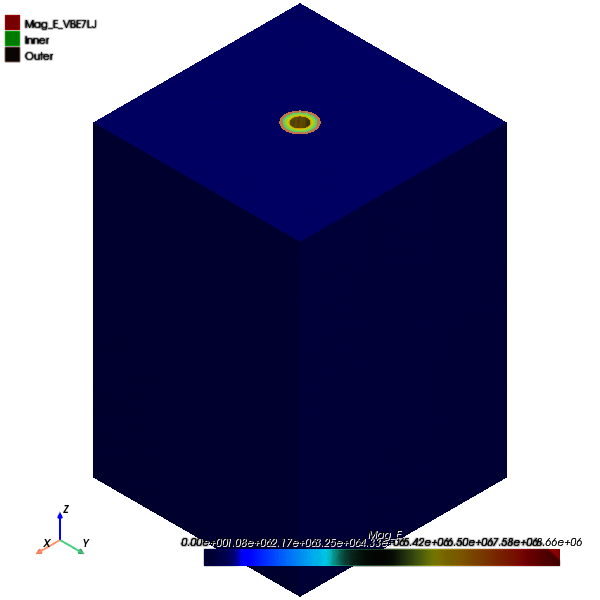

In [29]:
m3CylinderPost.plot_field('Mag_E','Region','Volume')

### def create_3d_plot

### def get_solution_data

### get Sol

In [23]:
solCylinderPost.export_data_to_csv('D:\EM_KDH\Moa_Edu_Sim\Basic/test.csv')

True

In [30]:
m3CylinderPost.export_field_plot(plot_name='Mag_E2',output_dir='D:\EM_KDH\Moa_Edu_Sim\Basic')

'D:\\EM_KDH\\Moa_Edu_Sim\\Basic\\Mag_E2.aedtplt'

In [16]:
m3dBattery.odesign.SetSolutionType("Electrostatic")

In [30]:
a=m3CylinderPost.ofieldsreporter

PyAEDT ERROR: case file format is not supported for this plot.


c:\Users\MOAVRXP\.conda\envs\py4AEDT\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


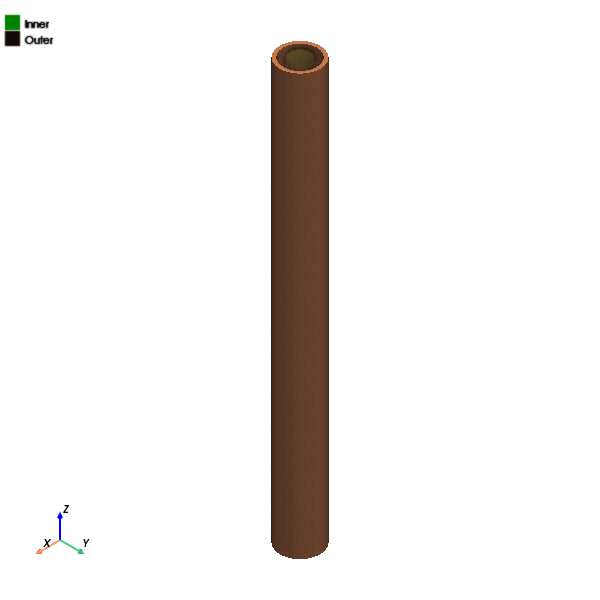

In [42]:
m3CylinderPost.plot_field_from_fieldplot(plot_name='E',project_path="",mesh_plot=True,image_format='png',view='isometric',plot_label='',show=True,)

## Parallel Plate Capacitor (Battery)

In [35]:
m3dBattery=Maxwell3d(
    project="D:\EM_KDH\Moa_Edu_Sim\Basic\Battery.aedt",
    version=AEDT_VERSION,
    new_desktop=False,
    non_graphical=NG_MODE,
)

PyAEDT INFO: Parsing D:\EM_KDH\Moa_Edu_Sim\Basic\Battery.aedt.
PyAEDT INFO: Python version 3.11.11 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:34:19) [MSC v.1929 64 bit (AMD64)]
PyAEDT INFO: PyAEDT version 0.11.7.
PyAEDT INFO: Returning found Desktop session with PID 75236!
PyAEDT INFO: Project Battery set to active.
PyAEDT INFO: File D:\EM_KDH\Moa_Edu_Sim\Basic\Battery.aedt correctly loaded. Elapsed time: 0m 2sec
PyAEDT INFO: Active Design set to Maxwell 3D_9W4
PyAEDT INFO: Aedt Objects correctly read


In [36]:
m3dBatteryModel=m3dBattery.modeler

PyAEDT INFO: Modeler class has been initialized! Elapsed time: 0m 0sec


In [ ]:
helixBattery=m3dBatteryModel.create_udp(dll="RectHelix.dll",parameters=[""],library="syslib")

PyAEDT ERROR: **************************************************************
PyAEDT ERROR:   File "<frozen runpy>", line 198, in _run_module_as_main
PyAEDT ERROR:   File "<frozen runpy>", line 88, in _run_code
PyAEDT ERROR:   File "c:\Users\MOAVRXP\.conda\envs\py4AEDT\Lib\asyncio\base_events.py", line 608, in run_forever
PyAEDT ERROR:     self._run_once()
PyAEDT ERROR:   File "c:\Users\MOAVRXP\.conda\envs\py4AEDT\Lib\asyncio\base_events.py", line 1936, in _run_once
PyAEDT ERROR:     handle._run()
PyAEDT ERROR:   File "c:\Users\MOAVRXP\.conda\envs\py4AEDT\Lib\asyncio\events.py", line 84, in _run
PyAEDT ERROR:     self._context.run(self._callback, *self._args)
PyAEDT ERROR:   File "C:\Users\MOAVRXP\AppData\Local\Temp\ipykernel_126316\1021341241.py", line 1, in <module>
PyAEDT ERROR:     m3dBatteryModel.create_udp(dll="RectHelix.dll",name="SegmentedHelix",parameters=["RecHeight","75"])
PyAEDT ERROR: 'str' object has no attribute 'name' on create_udp
PyAEDT ERROR: Last Electronics Desktop 

False

In [80]:
RectHelixObj=m3dBatteryModel.get_object_from_name('RectHelix1:CreateUserDefinedPart:1')

In [99]:
m3dBatteryModel.create_udp(dll="SegmentedHelix/RectHelix.dll",parameters=[["RectHeight","75mm"], ["RectWidth","2mm"],["StartHelixRadius","12mm"],["RadiusChange","6mm"],["Pitch","0mm"],["Turns","2.5"],["SegmentsPerTurn","0"],["RightHanded","1"]],library="syslib",name='RectHelixD')

In [ ]:
m3dBatteryModel.update_udp(assignment="RectHelixD",
                           )

In [2]:
from ansys.aedt.core import generic

In [ ]:
m3d